In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
#import matplotlib.pylab as plt
import scipy as sp
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter
from matplotlib.dates import AutoDateLocator, DateFormatter

## 2020+2021

In [10]:
df = pd.read_excel('/Users/niyiwei/Desktop/datav3/相关性系数/透视表.xlsx',index_col=0)
df.head()

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
关键词,,,,,,,,,,,,,,,,,,,,,
回应,0.021473,0.000730,0.015827,0.030092,0.061215,0.046635,0.022659,0.025328,0.004959,0.009635,...,0.020141,0.017955,0.070401,0.003372,0.024091,0.009988,0.008683,0.044983,0.007894,0.006876
中国,0.002087,0.003744,0.006267,0.004055,0.031767,0.010102,0.011563,0.011863,0.011058,0.007062,...,0.129817,0.080715,0.022406,0.013171,0.040981,0.018434,0.038381,0.038672,0.027912,0.018070
确诊,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019099,0.038670,0.049934,0.029094,0.030987,0.028130,0.023056,0.019321,0.022281,0.033315
新冠,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000857,0.002780,0.003210,0.000545,0.003228,0.005551,0.009740,0.000398,0.002647,0.003521
疫情,0.000000,0.006659,0.000841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001214,...,0.041009,0.013776,0.000162,0.005423,0.011526,0.032856,0.025118,0.023901,0.009240,0.015674


In [11]:
df

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31
关键词,,,,,,,,,,,,,,,,,,,,,
回应,0.021473,0.000730,0.015827,0.030092,0.061215,0.046635,0.022659,0.025328,0.004959,0.009635,...,0.020141,0.017955,0.070401,0.003372,0.024091,0.009988,0.008683,0.044983,0.007894,0.006876
中国,0.002087,0.003744,0.006267,0.004055,0.031767,0.010102,0.011563,0.011863,0.011058,0.007062,...,0.129817,0.080715,0.022406,0.013171,0.040981,0.018434,0.038381,0.038672,0.027912,0.018070
确诊,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019099,0.038670,0.049934,0.029094,0.030987,0.028130,0.023056,0.019321,0.022281,0.033315
新冠,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000857,0.002780,0.003210,0.000545,0.003228,0.005551,0.009740,0.000398,0.002647,0.003521
疫情,0.000000,0.006659,0.000841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001214,...,0.041009,0.013776,0.000162,0.005423,0.011526,0.032856,0.025118,0.023901,0.009240,0.015674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
影片资料,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
每逢,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
飞牛,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
df['sum'] = df.apply(sum,axis=1)

In [14]:
df1 = df.sort_values(by='sum',ascending=False).iloc[:11,:-1].T
df1

关键词,回应,中国,确诊,新冠,疫情,美国,病例,男子,新增,女子,武汉
2020-01-01,0.021473,0.002087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000301
2020-01-02,0.000730,0.003744,0.000000,0.000000,0.006659,0.000000,0.000000,0.001084,0.000000,0.000000,0.011621
2020-01-03,0.015827,0.006267,0.000000,0.000000,0.000841,0.010290,0.000000,0.005467,0.000000,0.000000,0.008366
2020-01-04,0.030092,0.004055,0.000000,0.000000,0.000000,0.033193,0.000000,0.000000,0.011001,0.000000,0.002468
2020-01-05,0.061215,0.031767,0.000000,0.000000,0.000000,0.017324,0.000000,0.000000,0.000000,0.000000,0.022405
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.009988,0.018434,0.028130,0.005551,0.032856,0.007717,0.014999,0.003849,0.018050,0.012883,0.000000
2021-12-28,0.008683,0.038381,0.023056,0.009740,0.025118,0.015005,0.008207,0.015079,0.021209,0.018646,0.003299
2021-12-29,0.044983,0.038672,0.019321,0.000398,0.023901,0.006471,0.001915,0.027498,0.015358,0.003980,0.000000
2021-12-30,0.007894,0.027912,0.022281,0.002647,0.009240,0.006734,0.003383,0.006134,0.019945,0.007154,0.000000


In [17]:
df1.apply(sum,axis=0)

关键词
回应    19.885714
中国    17.650050
确诊    14.483595
新冠    13.952180
疫情    11.891934
美国    11.666047
病例     8.749347
男子     8.284756
新增     8.188836
女子     8.156280
武汉     7.653625
dtype: float64

In [ ]:
x = df1.index
y1 = df1['回应']
y2 = df1['中国']
y3 = df1['确诊']
y4 = df1['新冠']
y5 = df1['疫情']

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签

plt.figure(figsize=[15,5])
plt.plot(x,y1,color = 'green',label='回应')
plt.plot(x,y2,color = 'orangered',label='中国')
plt.plot(x,y3,color = 'b',label='确诊')
plt.plot(x,y4,color = 'r',label='新冠')
plt.plot(x,y5,color = 'darkcyan',label='疫情')
plt.legend()
plt.title("Time Series of Weibo Search Top") 
plt.xlabel("Time")  # X轴标签
plt.ylabel("Frequency")  # Y轴标签
plt.savefig('Time Series of Weibo Search Top.png')
plt.show()

## 2020

In [18]:
df2 = pd.read_excel('../相关性系数/透视表.xlsx',index_col=0).T
df3 = df2.reset_index()
df3['date'] = df3['index'].apply(lambda x:x[:4])
df4 = df3[df3['date'] == '2020'].iloc[:,1:-1].T
df4['sum'] = df4.apply(sum,axis=1)
df4 = df4.sort_values(by='sum',ascending=False).iloc[:10,-1].T
df4

关键词
回应     11.044617
新冠      9.792695
确诊      9.199660
中国      8.192887
美国      8.002658
疫情      7.424129
武汉      6.631506
肺炎      6.585254
病例      6.324748
特朗普     5.310846
Name: sum, dtype: float64

In [ ]:
x = df3.index
y1 = df3['回应']
y2 = df3['中国']
y3 = df3['确诊']
y4 = df3['新冠']
y5 = df3['疫情']

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签

plt.figure(figsize=[15,5])
plt.plot(x,y1,color = 'green',label='回应')
plt.plot(x,y2,color = 'orangered',label='中国')
plt.plot(x,y3,color = 'b',label='确诊')
plt.plot(x,y4,color = 'r',label='新冠')
plt.plot(x,y5,color = 'darkcyan',label='疫情')
plt.legend()
plt.title("Time Series of Weibo Search Top") 
plt.xlabel("Time")  # X轴标签
plt.ylabel("Frequency")  # Y轴标签
plt.savefig('Time Series of Weibo Search Top.png')
plt.show()

## 2021

In [2]:
df2 = pd.read_excel('/Users/niyiwei/Desktop/datav3/相关性系数/透视表.xlsx',index_col=0).T
df3 = df2.reset_index()
df3['date'] = df3['index'].apply(lambda x:x[:4])
df4 = df3[df3['date'] == '2021'].iloc[:,1:-1].T
df4['sum'] = df4.apply(sum,axis=1)
df4 = df4.sort_values(by='sum',ascending=False).iloc[:10,-1].T
df4

关键词
中国    9.457163
回应    8.841097
女子    5.576800
男子    5.556235
确诊    5.283935
疫情    4.467805
新冠    4.159485
疫苗    4.104601
新增    3.882495
美国    3.663388
Name: sum, dtype: float64

In [14]:
x = df1.index
y1 = df1['回应']
y2 = df1['中国']
y3 = df1['确诊']
y4 = df1['新冠']
y5 = df1['疫情']

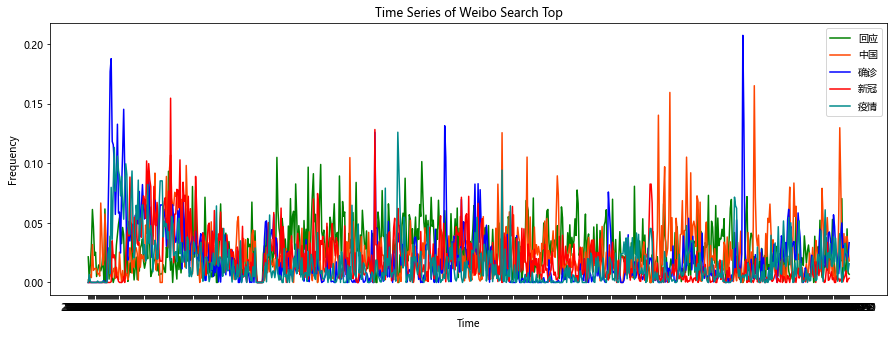

In [19]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签

plt.figure(figsize=[15,5])
plt.plot(x,y1,color = 'green',label='回应')
plt.plot(x,y2,color = 'orangered',label='中国')
plt.plot(x,y3,color = 'b',label='确诊')
plt.plot(x,y4,color = 'r',label='新冠')
plt.plot(x,y5,color = 'darkcyan',label='疫情')
plt.legend()
plt.title("Time Series of Weibo Search Top") 
plt.xlabel("Time")  # X轴标签
plt.ylabel("Frequency")  # Y轴标签
plt.savefig('Time Series of Weibo Search Top.png')
plt.show()